In [ ]:
import numpy as np
from scipy.special import jn #Discrete Bessel function J_n^(Ns)(x) in an infinite volume.


def J_discrete(n, x, Ns):
    """
    Discrete Bessel function J_n^(Ns)(x).
    """
    m = np.arange(Ns)  # m = 0,1,...,Ns-1
    factor = ((-1j) ** n) / Ns
    exponent = 1j * ((2 * np.pi * m * n) / Ns + x * np.cos(2 * np.pi * m / Ns))
    return factor * np.sum(np.exp(exponent))


In [20]:
n = 0
J = 0.02
h_t = 1
x = 2*J*h_t
Ns = 8
x_vals = np.arange(0, 15, x)

j0_fin_vals = [J_discrete(n, x, Ns) for x in x_vals]

j0_inf_vals = jn(0, x_vals)

diff_vals = j0_fin_vals - j0_inf_vals

j0_inf_vals8 = jn(8, x_vals)
j0_inf_vals_minus8 = jn(-8, x_vals)
sum_vals = j0_inf_vals8 + j0_inf_vals_minus8

C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


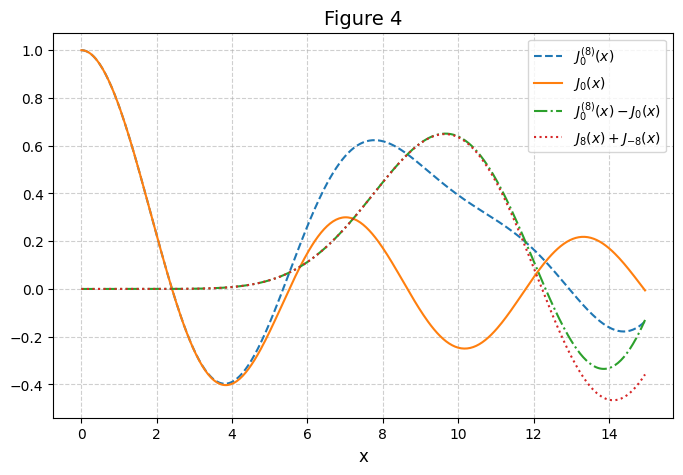

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(x_vals, j0_fin_vals, linestyle="--", label=r"$J^{(8)}_0(x)$")
plt.plot(x_vals, j0_inf_vals, linestyle="-", label=r"$J_0(x)$")
plt.plot(x_vals, diff_vals, linestyle="-.", label=r"$J^{(8)}_0(x) - J_0(x)$")
plt.plot(x_vals, sum_vals, linestyle="dotted", label=r"$J_8(x) + J_{-8}(x)$")
plt.xlabel(r"x", fontsize=12)
plt.title(r"Figure 4", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()